# Задание 2.2

$X_1, X_2, \dots X_n \sim$ Geom($\theta$), $\theta \sim$ Beta$(a, b)$, $a, b > 0$

Geom($\theta$): $P(X = k) = \theta (1 - \theta)^{k-1}$

$$p_{a, b}(\theta) = \frac{\theta^{a - 1}(1-\theta)^{b-1}}{\Gamma(a) \Gamma(b)} \Gamma(a+b) \cal{1}(0 \le \theta \le 1) = \frac{\theta^{a - 1}(1-\theta)^{b-1}}{\Beta(a, b)} \cal{1}(0 \le \theta \le 1)$$


Понятно, что $\Beta(1, 1) = U[0, 1]$

Для квадратичной функции потерь:
$$p(\theta | X) = \frac{L(X|\theta) \pi(\theta)}{\int{L(X|\theta) \pi(\theta)}}$$

Числитель:

$$L(X|\theta) \pi(\theta) = (\prod \theta (1 - \theta)^{x_i-1}) \cdot \frac{\theta^{a - 1}(1-\theta)^{b-1}}{\Beta(a, b)} = \frac{\theta^n (1-\theta)^{\sum x_i - n} \theta^{a - 1}(1-\theta)^{b-1}}{\Beta(a, b)} = \frac{\theta^{a+n-1} (1-\theta)^{\sum x_i + b - n -1}}{\Beta(a, b)}$$

Положим $S = \sum x_i$.

Знаменатель (интеграл):

$$\int_0^1 \frac{\theta^{a+n-1} (1-\theta)^{S
 + b - n -1}}{\Beta(a, b)} d \theta = 
\frac{\Beta(a+n,S+b-n)}{\Beta(a, b)}$$

Тогда

$$p(\theta | X) = \frac{L(X|\theta) \pi(\theta)}{\int{L(X|\theta) \pi(\theta)}} = 
\frac{\theta^{a+n-1} (1-\theta)^{S + b - n -1}}{\Beta(a+n,S+b-n)}$$

Значит, $\theta | X \sim \Beta(a+n, S+b-n)$

Тогда Байесовская оценка параметра $\theta$ такая:

$$\hat{\theta}_B
= \mathbb{E} [\theta | X]
= \frac{a+n}{(a+n)+(S+b-n)}
= \frac{a+n}{a+b+\sum x_i}$$


In [91]:
from scipy import stats
import matplotlib.pyplot as plt

In [92]:
SAMPLE_SIZES = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 10000]
M = 100
a = b = 1
theta_true = 0.7
rnd = stats.geom(theta_true)

In [93]:
sample = [[[rnd.rvs() for _ in range(sz)] for _ in range(M)] for sz in SAMPLE_SIZES]

In [94]:
def estimate_theta(s):
    return (a + len(s)) / (a + b + sum(s))

In [95]:
estimated = [[estimate_theta(sample[i][j]) - theta_true for j in range(M)] for i in range(len(SAMPLE_SIZES))]

In [96]:
print("N\t\t\ttheta")
for i in range(len(SAMPLE_SIZES)):
    print(f"{SAMPLE_SIZES[i]}\t\t\t{estimate_theta(sample[i][0])}")

N			theta
1			0.5
5			0.6666666666666666
10			0.7333333333333333
20			0.6
50			0.6623376623376623
100			0.696551724137931
200			0.7102473498233216
500			0.6881868131868132
1000			0.7170487106017192
10000			0.7021201909575961


Случайная величина - $(\hat{\theta}_B - \theta)$ рассчитанная для фиксированного `N`. Соотвественно объем выборки `M`.

Посчитаем выборочные характеристики: среднее, дисперсия, медиана, минимум, максимум, количество оценок, которые отличаются от теортического параметра не более чем на заданный порог.

Порогом для совпадение поставим отличие не более чем на 0.005


In [97]:
def sample_mean(s):
    return sum(s) / len(s)

def sample_variance(s):
    m = sample_mean(s)
    return sample_mean(list(map(lambda x: (x - m) ** 2, s)))

def sample_median(s):
    return sorted(s)[len(s) // 2]

lim = 0.005

def sample_cnt_good(s):
    return len(tuple(filter(lambda x: abs(x) < lim , s)))

In [98]:
def process_stats(s, N):
    print(f"=================== N={N} ===================")
    plt.plot(s)
    mn = min(min(s) - 1, -1)
    mx = max(max(s) + 1, 1)
    plt.ylim(mn, mx)
    plt.show()

    def print_stat(name, stat):
        print(f"{name}\t\t{stat(s)}")

    print_stat("Mean", sample_mean)
    print_stat("Variance", sample_variance)
    print_stat("Median", sample_median)
    print_stat("Max", max)
    print_stat("Min", min)
    print_stat("Good", sample_cnt_good)

=================== N=1 ===================


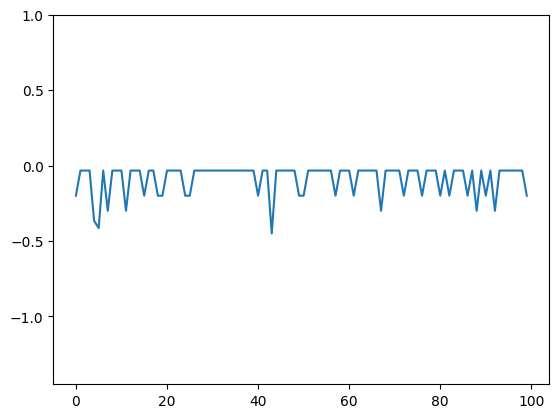

Mean		-0.0879761904761904
Variance		0.009868183106575945
Median		-0.033333333333333326
Max		-0.033333333333333326
Min		-0.44999999999999996
Good		0
=================== N=5 ===================


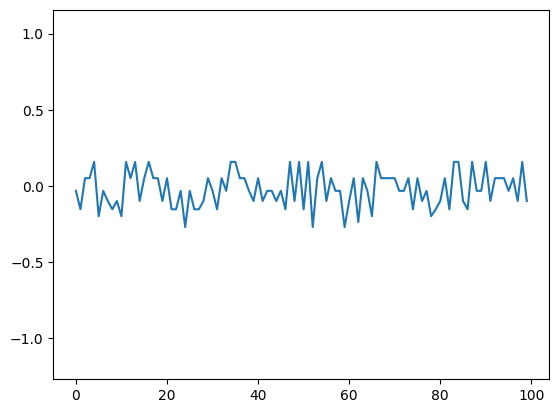

Mean		-0.02330885780885779
Variance		0.013477630479493862
Median		-0.033333333333333326
Max		0.15714285714285714
Min		-0.2714285714285714
Good		0
=================== N=10 ===================


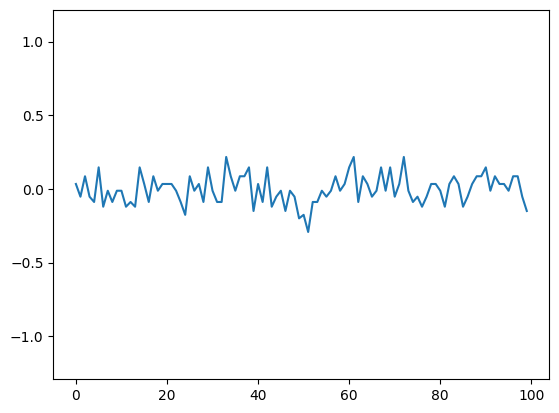

Mean		-0.0038569918070691643
Variance		0.009476282667449766
Median		-0.012499999999999956
Max		0.21666666666666667
Min		-0.29259259259259257
Good		0
=================== N=20 ===================


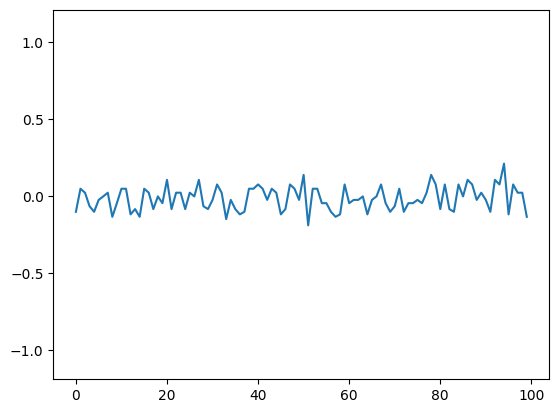

Mean		-0.012701022501032073
Variance		0.0060321165842697425
Median		-0.022580645161290325
Max		0.21304347826086956
Min		-0.18780487804878043
Good		6
=================== N=50 ===================


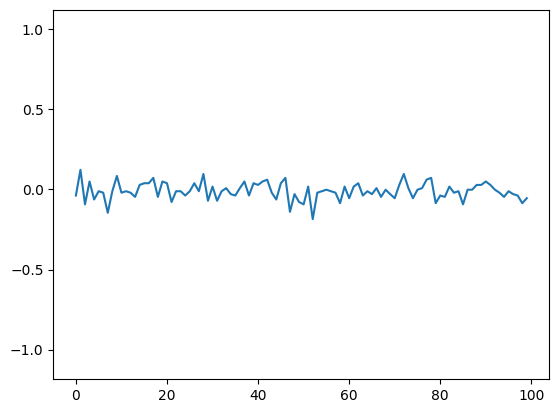

Mean		-0.010226475237466386
Variance		0.002779253421765181
Median		-0.010810810810810811
Max		0.12258064516129041
Min		-0.18484848484848482
Good		6
=================== N=100 ===================


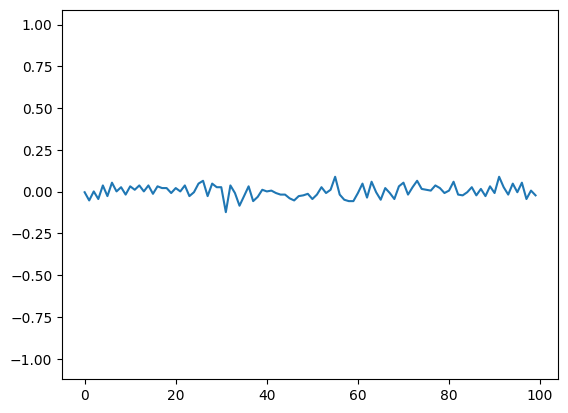

Mean		0.0020698653013138278
Variance		0.0013405219935750548
Median		0.001388888888888884
Max		0.08906250000000004
Min		-0.12285714285714278
Good		10
=================== N=200 ===================


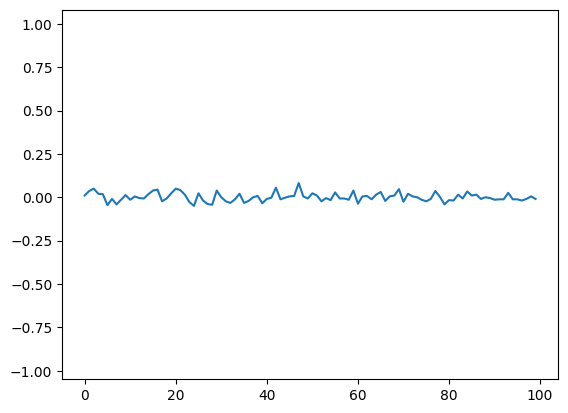

Mean		0.0008713189979513126
Variance		0.0006147597638033191
Median		-0.002083333333333326
Max		0.08210116731517514
Min		-0.04951456310679603
Good		10
=================== N=500 ===================


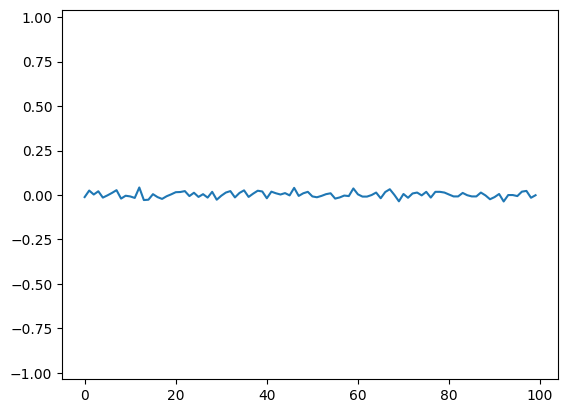

Mean		0.0015871545604862947
Variance		0.0002655109873628094
Median		-0.00027932960893850556
Max		0.04222222222222227
Min		-0.03642384105960261
Good		21
=================== N=1000 ===================


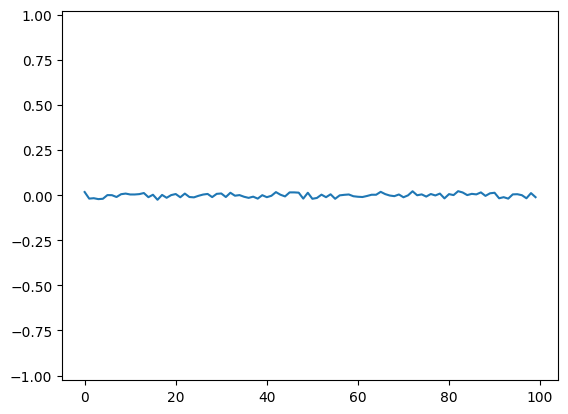

Mean		-0.0015997200709596338
Variance		0.00012377938452515962
Median		0.0
Max		0.021701514059120464
Min		-0.025925925925925908
Good		36
=================== N=10000 ===================


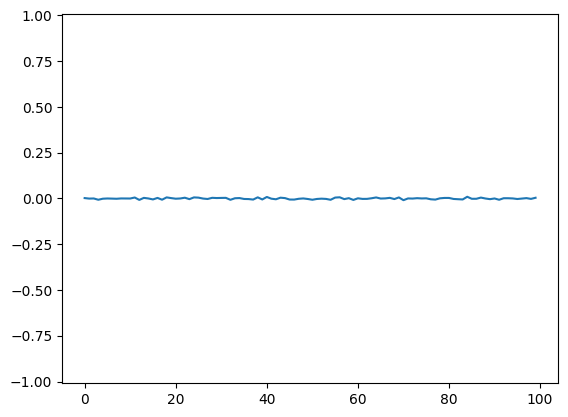

Mean		-0.0004701914981266775
Variance		1.5535069207074255e-05
Median		-9.097907481270262e-05
Max		0.009240479398624268
Min		-0.009370899799737598
Good		75


In [99]:
for i in range(len(SAMPLE_SIZES)):
    process_stats(estimated[i], SAMPLE_SIZES[i])